# Sample Household Survey: Age of HDB Resident Population, by Flat Type

This notebook analyzes the distribution of age group in HDB populations by flat type

Data URL : https://data.gov.sg/dataset/age-of-hdb-population-by-ethnic-group-and-flat-type-in-age-groups?resource_id=c784c6dc-1451-47ab-abd6-939cbe905115

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.gridspec import GridSpec

# set global plot aesthetics
rcParams['axes.titlesize'] = 18
rcParams['axes.titlepad'] = 15
rcParams['axes.labelsize'] = 14
rcParams['axes.labelpad'] = 10
rcParams['axes.labelsize'] = 12


%matplotlib inline

In [2]:
file= "data/age-of-hdb-resident-population-by-flat-type.csv"

title = "Age of HDB resident population by flat type"
print("***{}***".format(title))

data = np.genfromtxt(file, skip_header=1, dtype=[('year','i8'), ('type','U50'),('age_group','U50'),
                                                 ('percentage','f8')], 
                     delimiter=",",missing_values=['na','-'],filling_values=[0])

numrecords = len(data)
years = np.unique(data['year'])
numtypes = np.unique(data['type'])
agegroups = np.unique(data['age_group'])

print("The data set has {} records".format(numrecords))
print("It covers {} years: {} and {}".format(len(years), years[0],years[1]))
print("There are {} flat types:".format(len(numtypes)))
print(numtypes)
print("There are {} age groups:".format(len(agegroups)))
print(agegroups)

***Age of HDB resident population by flat type***
The data set has 42 records
It covers 2 years: 2008 and 2013
There are 7 flat types:
['1-room' '2-room' '3-room' '4-room' '5-room' 'All' 'Executive']
There are 3 age groups:
['15-64' '65 & above' 'Below 15']


# Compare age group distribution in 2008 and 2013

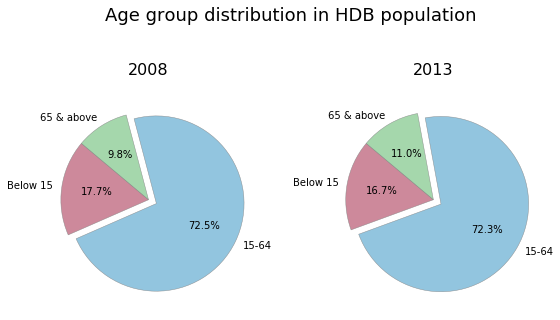

In [3]:
#plot age_group distribution comparing years 2008 and 2013
def get_pie(data,filename):


    fig= plt.figure(figsize=(10,10))

    the_grid = GridSpec(1, 2) #use grid spec to control layout of the pie charts

    #set aesthestics
    colors = ['#C16C82', '#77B7D8', '#8FCD98']
    explode = (0, 0.1, 0)
    wedgeprops = {'alpha': 0.8,'edgecolor':'gray','linewidth':0.5}

    for i,year in enumerate(np.unique(data['year'])):
        plt.subplot(the_grid[0, i], aspect=1)
        plt.pie(data['percentage'][data['year']==year], explode=explode, 
                  labels=data['age_group'][data['year']==year], colors=colors,
            autopct='%1.1f%%',  startangle=140, wedgeprops = wedgeprops)
        plt.title(year, fontsize=16)

    plt.suptitle('Age group distribution in HDB population',fontsize=18, x=0.55)
 
    plt.subplots_adjust(left=0.2, wspace=0.3, top=1.3)
    
    plt.savefig(filename, dpi = 300, bbox_inches='tight')
    plt.show()


selection = "All" #show pie chart for overall distribution across all room types
filename = "generatedplots/"+ selection + "_agegroup_distribution.png"
get_pie(data[data['type']==selection], filename)

 

# Compare age group distribution by room type in 2013

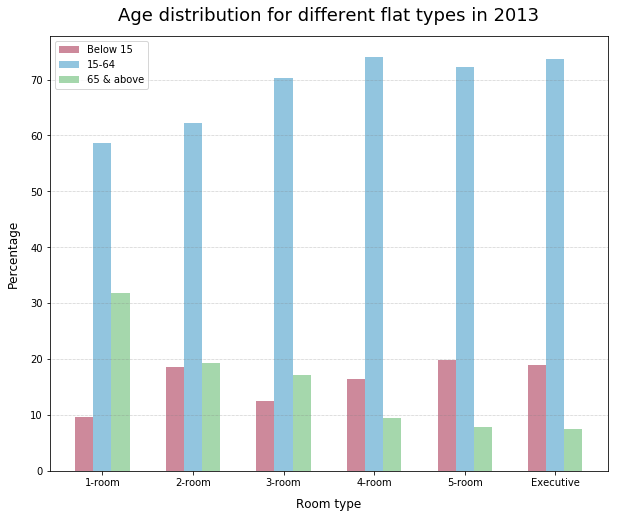

In [4]:
def get_bar_charts(data, filename, year):
    
    fig, ax = plt.subplots(figsize=(10,8))
    data = data[data['year']==year]
    
    xpos = np.arange(0, len(data)/3) #3 bars corresponding to 3 age groups for each room type
    xlabels = data['type'][data['age_group']=='Below 15'] #get unique room types, retaining the same sequence as data for plotting
    bar_width = 0.2
    opacity = 0.8

    ax.bar(xpos, data['percentage'][data['age_group']=='Below 15'], bar_width, alpha=opacity, color='#C16C82',label="Below 15")
    ax.bar(xpos + bar_width, data['percentage'][data['age_group']=='15-64'], bar_width, alpha=opacity, color='#77B7D8',label='15-64')
    ax.bar(xpos + (bar_width*2), data['percentage'][data['age_group']=='65 & above'], bar_width, alpha=opacity, color='#8FCD98',label='65 & above')
    
    ax.set_xticks(xpos + bar_width) #set x-tick at the middle of each group of 3 bars
    ax.set_xticklabels(xlabels)
    
    ax.set_title('Age distribution for different flat types in {}'.format(year)) 
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Room type')
             
    ax.grid(color='gray', linestyle=':', linewidth=0.5, axis='y', which='major')
    
    plt.legend()
    plt.savefig(filename, dpi = 300, bbox_inches='tight')
    plt.show()

    
year = 2013
filename = "generatedplots/"+ str(year) + "agegroup_distribution_roomtype.png"
 
get_bar_charts(data[data['type']!='All'], filename, year) #show barchart for each room type